In [1]:
from io import StringIO

import pdfminer
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Perform layout analysis for all text
laparams = pdfminer.layout.LAParams()
setattr(laparams, 'all_texts', True)

def convert_pdf_to_text(file_path):
        
    output_string = StringIO()
    
    with open(file_path, 'rb') as in_file:
        parser = PDFParser(in_file)
        doc = PDFDocument(parser)
        rsrcmgr = PDFResourceManager()
        device = TextConverter(rsrcmgr, output_string, laparams=laparams)
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        for page in PDFPage.create_pages(doc):
            interpreter.process_page(page)

    return output_string.getvalue()

In [2]:
import glob
from tqdm import tqdm

file_names = glob.glob("src/*")
file_names[:5]

['src\\1.pdf', 'src\\10.pdf', 'src\\11.pdf', 'src\\12.pdf', 'src\\13.pdf']

In [3]:
from tqdm import tqdm

raw_text_extract_list = [convert_pdf_to_text(file_name) for file_name in tqdm(file_names)]

100%|██████████| 96/96 [05:02<00:00,  3.15s/it]


In [4]:
import pandas as pd
import numpy as np

# extract the timestamps of all publications

df_timestamp = pd.read_csv("papers_timestamp.csv")
df_timestamp

,File_name,Timestamp
0,src\1.pdf,Apr-16
1,src\10.pdf,Nov-17
2,src\11.pdf,Jan-20
3,src\12.pdf,Aug-20
4,src\13.pdf,Aug-18
...,...,...
91,src\92.pdf,May-13
92,src\93.pdf,Mar-13
93,src\94.pdf,Feb-13
94,src\95.pdf,Aug-17


In [5]:
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\pandas\_config\config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
c:\users\biadge\appdata\local\programs\python\python37\lib\site-packages\pandas\_config\config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [6]:
additional_stopwords = [
    "university",
    "acm",
    "copyright",
    "ieee",
    "research",
    "conference",
    "workshop",
    "international",
    "journal",
    "proceedings",
    "paper",
    "software",
    "traceability",
    "trace",
    "link",
    "introduction",
    "literature",
    "method",
    "methodology",
    "result",
    "conclusion",
    "discussion",
    "fig",
    "figure",
    "acknowledgement",
    "section"
]

In [7]:
def remove_text_before_abstract(text):
    
    text = " ".join(text)
    
    if "abstract" in text:
        text_list = text.split("abstract")
    elif "a b s t r a c t" in text:
        text_list = text.split("a b s t r a c t")
    else:
        text_list = ["",text]
    
    return text_list[1]

In [8]:
import re
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

from gensim.utils import lemmatize

stemmer = SnowballStemmer(language='english')

nlp = spacy.load('en_core_web_lg')

s_words = stopwords.words()

def run_text_processing_stemmed(text):
    text = text.replace("\n"," ") # remove new line characters
    text = text.replace("cid"," ") # remove cid characters relating to non-unicode characters
    text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text) # keep only alphanumeric
    text = re.sub(' +', ' ', text) # remove multiple whitespaces
    text = text.lower() # convert all to lowercase
    
    text_tokens = word_tokenize(text) # tokenise text
    text_tokens = [word for word in text_tokens if not word in s_words] # remove stopwords
    text_tokens = [word for word in text_tokens if not word in additional_stopwords] # remove additional stopwords
    text_tokens = [word for word in text_tokens if (len(word) > 2 and not word.isdecimal())] # remove anything with 2 chars and below

    text_tokens = [word.lemma_ for word in nlp(" ".join(text_tokens))]
    
    text_tokens = remove_text_before_abstract(text_tokens)
    
    text_tokens = word_tokenize(text_tokens)

    text_tokens_stem = [stemmer.stem(word) for word in text_tokens]

    return " ".join(text_tokens_stem)

def run_text_processing(text):
    text = text.replace("\n"," ") # remove new line characters
    text = text.replace("cid"," ") # remove cid characters relating to non-unicode characters
    text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text) # keep only alphanumeric
    text = re.sub(' +', ' ', text) # remove multiple whitespaces
    text = text.lower() # convert all to lowercase
    
    text_tokens = word_tokenize(text) # tokenise text
    text_tokens = [word for word in text_tokens if not word in s_words] # remove stopwords
    text_tokens = [word for word in text_tokens if not word in additional_stopwords] # remove additional stopwords
    text_tokens = [word for word in text_tokens if (len(word) > 2 and not word.isdecimal())] # remove anything with 2 chars and below
    
    text_tokens = [word.lemma_ for word in nlp(" ".join(text_tokens))]
    text_tokens = remove_text_before_abstract(text_tokens)
    
    return text_tokens

def run_text_processing_2(text):
    text = text.replace("\n"," ") # remove new line characters
    text = text.replace("cid"," ") # remove cid characters relating to non-unicode characters
    text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text) # keep only alphanumeric
    text = re.sub(' +', ' ', text) # remove multiple whitespaces
    text = text.lower() # convert all to lowercase
    
    text_tokens = word_tokenize(text) # tokenise text
    text_tokens = [word for word in text_tokens if not word in s_words] # remove stopwords
    text_tokens = [word for word in text_tokens if not word in additional_stopwords] # remove additional stopwords
    text_tokens = [word for word in text_tokens if (len(word) > 2 and not word.isdecimal())] # remove anything with 2 chars and below
    
    text_tokens = " ".join(text_tokens)
    text_tokens = [word.decode('utf-8').split('/')[0] for word in lemmatize(text_tokens)]
    text_tokens = remove_text_before_abstract(text_tokens)
    
    return text_tokens

In [9]:
clean_text_extract_list = [run_text_processing(x) for x in tqdm(raw_text_extract_list)]
# clean_text_extract_list_stemmed = [run_text_processing_stemmed(x) for x in tqdm(raw_text_extract_list)]

100%|██████████| 96/96 [02:12<00:00,  1.38s/it]


In [14]:
clean_text_extract_list_2 = [run_text_processing_2(x) for x in raw_text_extract_list]

In [15]:
# pd.set_option('display.max_columns', None)
# pd.set_option('max_colwidth', None)

df = pd.DataFrame(np.transpose([file_names, clean_text_extract_list]), columns=['File_name', 'Text_extract'])
df = df.merge(df_timestamp, on='File_name')
df

,File_name,Text_extract,Timestamp
0,src\1.pdf,one major problem development process manage ...,Apr-16
1,src\10.pdf,recover link artifact requirement common task...,Nov-17
2,src\11.pdf,development devops practice widely use approa...,Jan-20
3,src\12.pdf,matter engineering community long time proces...,Aug-20
4,src\13.pdf,aim address problem incompleteness inconsiste...,Aug-18
...,...,...,...
91,src\92.pdf,large development project receive many bug re...,May-13
92,src\93.pdf,completely analyze closed issue report develo...,Mar-13
93,src\94.pdf,credit permit copy otherwise republish post s...,Feb-13
94,src\95.pdf,use case drive modularization improve code co...,Aug-17


In [16]:
df_2 = pd.DataFrame(np.transpose([file_names, clean_text_extract_list_2]), columns=['File_name', 'Text_extract'])
df_2 = df_2.merge(df_timestamp, on='File_name')
df_2

,File_name,Text_extract,Timestamp
0,src\1.pdf,major problem development process manage arte...,Apr-16
1,src\10.pdf,recover link artifact requirement common task...,Nov-17
2,src\11.pdf,development devop practice widely used approa...,Jan-20
3,src\12.pdf,matter engineering community long time proces...,Aug-20
4,src\13.pdf,aim address problem incompleteness inconsiste...,Aug-18
...,...,...,...
91,src\92.pdf,large development project receive many bug re...,May-13
92,src\93.pdf,completely analyze close issue report develop...,Mar-13
93,src\94.pdf,credit permit copy otherwise republish post s...,Feb-13
94,src\95.pdf,use case drive modularization improve code co...,Aug-17


In [17]:
df.to_csv("d2p_enase_data_spacy.csv", encoding="utf-8", index=False)
df_2.to_csv("d2p_enase_data_gensim.csv", encoding="utf-8", index=False)

## Start here to read csv file

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# pd.set_option('display.max_columns', None)
# pd.set_option('max_colwidth', None)


df = pd.read_csv("d2p_enase_data_spacy.csv")
# df = pd.read_csv("d2p_enase_data_gensim.csv")

In [19]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%b-%y").dt.to_period('M')
df = df.sort_values('Timestamp').reset_index(drop=True)
df['Year'] = df['Timestamp'].dt.year
df

,File_name,Text_extract,Timestamp,Year
0,src\94.pdf,credit permit copy otherwise republish post s...,2013-02,2013
1,src\93.pdf,completely analyze closed issue report develo...,2013-03,2013
2,src\90.pdf,information retrieval method partic ular topi...,2013-05,2013
3,src\92.pdf,large development project receive many bug re...,2013-05,2013
4,src\91.pdf,automate requirement retrieval ontology use i...,2013-05,2013
...,...,...,...,...
91,src\45.pdf,automatic recovery artifact may promote early...,2021-07,2021
92,src\96.pdf,application programming interface api library...,2021-07,2021
93,src\62.pdf,architecture documentation often consist dif ...,2021-08,2021
94,src\51.pdf,information fundamental prereq uisite many es...,2021-09,2021


## EDA

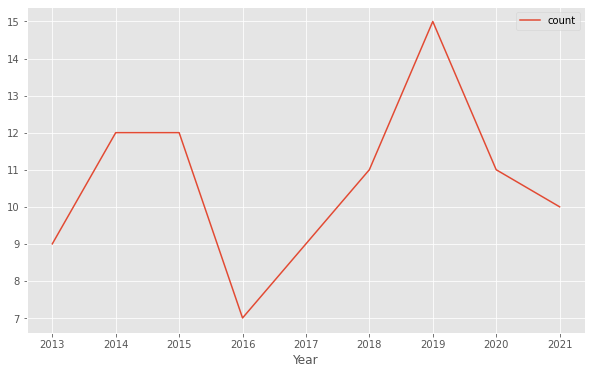

In [20]:
grouped_df = df.groupby('Year').size().to_frame("count").reset_index()

grouped_df.plot(kind='line', x='Year', y='count', figsize=(10,6))

In [21]:
grouped_df

,Year,count
0,2013,9
1,2014,12
2,2015,12
3,2016,7
4,2017,9
5,2018,11
6,2019,15
7,2020,11
8,2021,10


## TFIDF Vectorizer - unigram, bi-gram, tri-gram

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer_1 = TfidfVectorizer(ngram_range=(1,1), norm='l2')
vectorizer_2 = TfidfVectorizer(ngram_range=(2,2), norm='l2')
vectorizer_3 = TfidfVectorizer(ngram_range=(3,3), norm='l2')
vectorizer = TfidfVectorizer(ngram_range=(1,3), norm='l2')

X_1 = vectorizer_1.fit_transform(df['Text_extract'])
X_2 = vectorizer_2.fit_transform(df['Text_extract'])
X_3 = vectorizer_3.fit_transform(df['Text_extract'])
X = vectorizer.fit_transform(df['Text_extract'])

features_1 = vectorizer_1.get_feature_names()
features_2 = vectorizer_2.get_feature_names()
features_3 = vectorizer_3.get_feature_names()
features = vectorizer.get_feature_names()

In [23]:
def top_n_tfidf_feats(row, features, top_n=100):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [24]:
def top_tfidf_feats(row, features):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    top_ids = np.argsort(row)[::-1][:]
    top_feats = [(features[i], row[i]) for i in top_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [25]:
def top_feats_in_doc(X, features, row_id):
    ''' Top tfidf features in specific doc (matrix row) '''
    row = np.squeeze(X[row_id].toarray())
    return top_n_tfidf_feats(row, features, top_n=100000)

In [26]:
def top_n_mean_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=100):
    ''' Return the top n features that (in total) are most important amongst documents in rows
        identified by indices in grp_ids. '''
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_n_tfidf_feats(tfidf_means, features, top_n)

In [27]:
def top_mean_feats(X, features, grp_ids=None, min_tfidf=0.1):
    ''' Return the top n features that on average are most important amongst documents in rows
        identified by indices in grp_ids. '''
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features)

In [28]:
def top_n_sum_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=100):
    ''' Return the top n features that (in total) are most important amongst documents in rows
        identified by indices in grp_ids. '''
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_sums = np.sum(D, axis=0)
    return top_n_tfidf_feats(tfidf_sums, features, top_n)

In [29]:
def top_sum_feats(X, features, grp_ids=None, min_tfidf=0.1):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_sums = np.sum(D, axis=0)
    return top_tfidf_feats(tfidf_sums, features)

In [30]:
def top_feats_by_year(X, y, features, min_tfidf=0.01, top_n=500000):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class year. '''
    dfs = []
    years = np.unique(y)
    for year in years:
        ids = np.where(y==year)
        feats_df = top_n_mean_feats(X, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.year = year
        dfs.append(feats_df)
    return dfs

In [31]:
dfs_1 = top_feats_by_year(X_1, df['Year'], features_1)
dfs_2 = top_feats_by_year(X_2, df['Year'], features_2)
dfs_3 = top_feats_by_year(X_3, df['Year'], features_3)
dfs = top_feats_by_year(X, df['Year'], features)

# remove 0 tfidf scores
dfs_1 = [df[df['tfidf']>0] for df in dfs_1]
dfs_2 = [df[df['tfidf']>0] for df in dfs_2]
dfs_3 = [df[df['tfidf']>0] for df in dfs_3]
dfs = [df[df['tfidf']>0] for df in dfs]

# set n-gram as id
dfs_1 = [df.set_index('feature') for df in dfs_1]
dfs_2 = [df.set_index('feature') for df in dfs_2]
dfs_3 = [df.set_index('feature') for df in dfs_3]
dfs = [df.set_index('feature') for df in dfs]

In [32]:
years = range(2013,2022)

In [33]:
ctr = 0

for year in years:
    dfs_1[ctr] = dfs_1[ctr].rename(columns={"tfidf": "{}-tfidf".format(year)})
    ctr+=1

In [34]:
ctr = 0

for year in years:
    dfs_2[ctr] = dfs_2[ctr].rename(columns={"tfidf": "{}-tfidf".format(year)})
    ctr+=1

In [35]:
ctr = 0

for year in years:
    dfs_3[ctr] = dfs_3[ctr].rename(columns={"tfidf": "{}-tfidf".format(year)})
    ctr+=1

In [36]:
ctr = 0

for year in years:
    dfs[ctr] = dfs[ctr].rename(columns={"tfidf": "{}-tfidf".format(year)})
    ctr+=1

### Unigram Ranking of Features - Year Trend

In [37]:
# pd.set_option('display.max_rows', None)

feats_df_1 = pd.concat(dfs_1, axis=1)
feats_df_1_sorted = feats_df_1.assign(Count_NA = lambda x: x.isnull().sum(axis=1)).sort_values('Count_NA', ascending=True).drop('Count_NA', axis=1)

feats_df_1_sorted

,2013-tfidf,2014-tfidf,2015-tfidf,2016-tfidf,2017-tfidf,2018-tfidf,2019-tfidf,2020-tfidf,2021-tfidf
feature,,,,,,,,,
use,0.141504,0.115825,0.114999,0.070020,0.119980,0.108469,0.101150,0.098391,0.077343
impact,0.010273,0.010569,0.003121,0.005601,0.036969,0.004248,0.022735,0.014298,0.008321
perform,0.003125,0.016110,0.004081,0.003678,0.007377,0.006019,0.010596,0.013312,0.006399
metric,0.003125,0.012636,0.009316,0.006909,0.002637,0.011506,0.007239,0.001315,0.009511
enhance,0.010308,0.001582,0.004083,0.004909,0.001869,0.012356,0.003446,0.002181,0.008799
...,...,...,...,...,...,...,...,...,...
retrieved,NaN,NaN,0.000867,NaN,NaN,NaN,NaN,NaN,NaN
uncertain,NaN,NaN,0.000867,NaN,NaN,NaN,NaN,NaN,NaN
shot,NaN,NaN,0.000873,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
req_feats_1 = feats_df_1_sorted[feats_df_1_sorted.index=='requirement']
req_feats_1.columns = [2013,2014,2015,2016,2017,2018,2019,2020,2021]
req_feats_1 = req_feats_1.transpose()
req_feats_1

feature,requirement
2013,0.053914
2014,0.085873
2015,0.098433
2016,0.097821
2017,0.079989
2018,0.121307
2019,0.117769
2020,0.071371
2021,0.075470


In [39]:
des_feats_1 = feats_df_1_sorted[feats_df_1_sorted.index=='design']
des_feats_1

,2013-tfidf,2014-tfidf,2015-tfidf,2016-tfidf,2017-tfidf,2018-tfidf,2019-tfidf,2020-tfidf,2021-tfidf
feature,,,,,,,,,
design,0.002956,0.022723,0.013743,0.015111,0.027704,0.035758,0.022261,0.039024,0.022316


In [40]:
des_feats_1 = feats_df_1_sorted[feats_df_1_sorted.index=='design']
des_feats_1.columns = [2013,2014,2015,2016,2017,2018,2019,2020,2021]
des_feats_1 = des_feats_1.transpose()
des_feats_1

feature,design
2013,0.002956
2014,0.022723
2015,0.013743
2016,0.015111
2017,0.027704
2018,0.035758
2019,0.022261
2020,0.039024
2021,0.022316


In [41]:
reqdes_feats = pd.concat([req_feats_1,des_feats_1],axis=1)

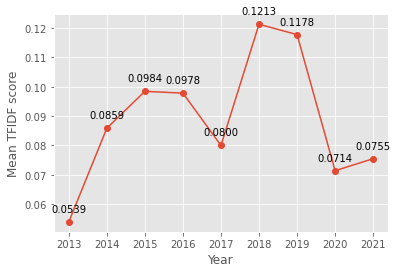

In [42]:
# req_feats_1[req_feats_1.index=='requirement'].transpose().plot(kind='line', figsize=(12,7),style='.-')

import matplotlib.pyplot as plt

plt.plot(req_feats_1,  marker='o')

plt.xlabel('Year')
plt.ylabel('Mean TFIDF score')

for x,y in zip(req_feats_1.index,req_feats_1['requirement']):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

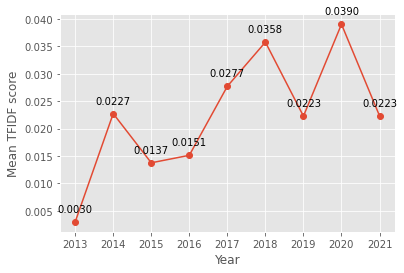

In [43]:
# req_feats_1[req_feats_1.index=='requirement'].transpose().plot(kind='line', figsize=(12,7),style='.-')

import matplotlib.pyplot as plt

plt.plot(des_feats_1,  marker='o')

plt.xlabel('Year')
plt.ylabel('Mean TFIDF score')

for x,y in zip(des_feats_1.index,des_feats_1['design']):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

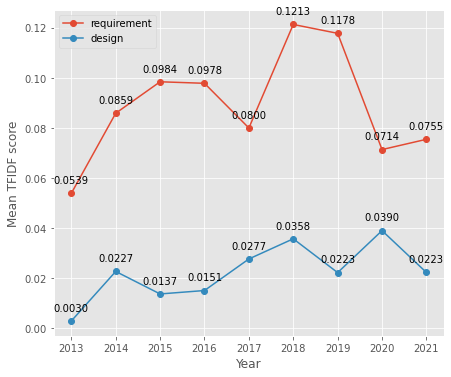

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(reqdes_feats,  marker='o')

plt.xlabel('Year')
plt.ylabel('Mean TFIDF score')

for x,y in zip(des_feats_1.index,des_feats_1['design']):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x,y in zip(req_feats_1.index,req_feats_1['requirement']):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.legend(['requirement','design'])

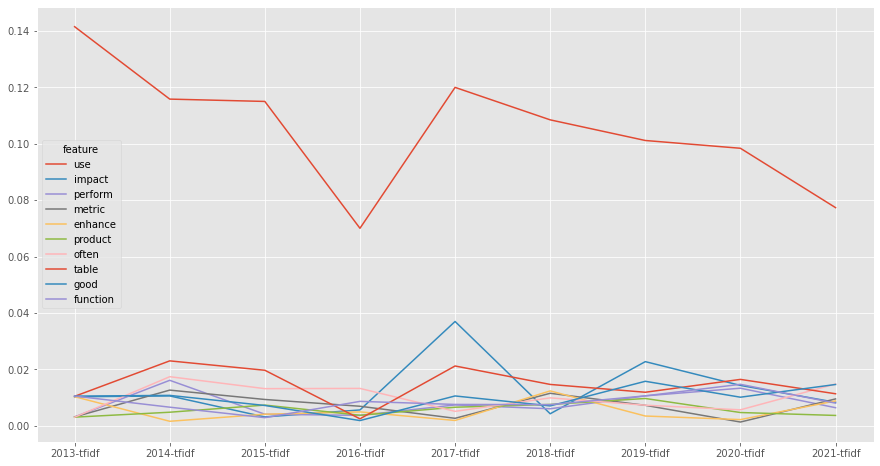

In [45]:
feats_df_1_sorted_sub = feats_df_1_sorted[:10]
# feats_df_1_sorted_sub = feats_df_1_sorted_sub.interpolate(axis=1)
feats_df_1_sorted_sub.transpose().plot(figsize=(15,8))

### Bi-gram Ranking of Features - Year Trend

In [46]:
# pd.set_option('display.max_rows', None)

feats_df_2 = pd.concat(dfs_2, axis=1)
feats_df_2_sorted = feats_df_2.assign(Count_NA = lambda x: x.isnull().sum(axis=1)).sort_values('Count_NA', ascending=True).drop('Count_NA', axis=1)

feats_df_2_sorted

,2013-tfidf,2014-tfidf,2015-tfidf,2016-tfidf,2017-tfidf,2018-tfidf,2019-tfidf,2020-tfidf,2021-tfidf
feature,,,,,,,,,
cleland huang,0.001124,0.002706,0.009394,0.009707,0.011191,0.015885,0.007392,0.010679,0.003234
model use,0.001122,0.002475,0.000836,0.002688,0.001224,0.001913,0.006068,0.003434,0.002156
textual information,0.020407,0.001080,0.003648,0.001600,0.003271,0.003594,0.003257,0.001860,0.010467
base approach,0.019875,0.000900,0.004927,0.012704,0.001462,0.005044,0.011794,0.005440,0.003090
requirement engineer,0.001424,0.002443,0.001644,0.001761,0.001211,0.002439,0.003774,0.001024,0.002603
...,...,...,...,...,...,...,...,...,...
vsm procedure,NaN,NaN,0.000947,NaN,NaN,NaN,NaN,NaN,NaN
retrieve indeed,NaN,NaN,0.000947,NaN,NaN,NaN,NaN,NaN,NaN
retrieve moreover,NaN,NaN,0.000947,NaN,NaN,NaN,NaN,NaN,NaN


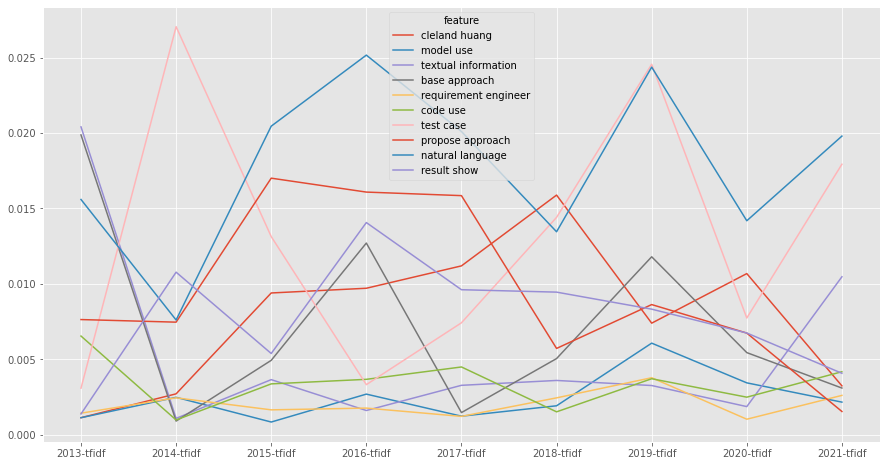

In [47]:
feats_df_2_sorted_sub = feats_df_2_sorted[:10]
feats_df_2_sorted_sub = feats_df_2_sorted_sub.interpolate(axis=1)
feats_df_2_sorted_sub.transpose().plot(figsize=(15,8))

In [48]:
feats_df_2_sorted_sub

,2013-tfidf,2014-tfidf,2015-tfidf,2016-tfidf,2017-tfidf,2018-tfidf,2019-tfidf,2020-tfidf,2021-tfidf
feature,,,,,,,,,
cleland huang,0.001124,0.002706,0.009394,0.009707,0.011191,0.015885,0.007392,0.010679,0.003234
model use,0.001122,0.002475,0.000836,0.002688,0.001224,0.001913,0.006068,0.003434,0.002156
textual information,0.020407,0.001080,0.003648,0.001600,0.003271,0.003594,0.003257,0.001860,0.010467
base approach,0.019875,0.000900,0.004927,0.012704,0.001462,0.005044,0.011794,0.005440,0.003090
requirement engineer,0.001424,0.002443,0.001644,0.001761,0.001211,0.002439,0.003774,0.001024,0.002603
code use,0.006538,0.000974,0.003366,0.003668,0.004488,0.001512,0.003707,0.002485,0.004173
test case,0.003081,0.027051,0.013133,0.003315,0.007417,0.014407,0.024557,0.007734,0.017930
propose approach,0.007631,0.007459,0.017006,0.016084,0.015848,0.005717,0.008625,0.006735,0.001536
natural language,0.015593,0.007602,0.020454,0.025166,0.020101,0.013453,0.024369,0.014182,0.019796


### Tri-gram Ranking of Features - Year Trend

In [49]:
# pd.set_option('display.max_rows', None)

feats_df_3 = pd.concat(dfs_3, axis=1)
feats_df_3_sorted = feats_df_3.assign(Count_NA = lambda x: x.isnull().sum(axis=1)).sort_values('Count_NA', ascending=True).drop('Count_NA', axis=1)

feats_df_3_sorted

,2013-tfidf,2014-tfidf,2015-tfidf,2016-tfidf,2017-tfidf,2018-tfidf,2019-tfidf,2020-tfidf,2021-tfidf
feature,,,,,,,,,
source code test,0.002789,0.004977,0.006607,0.005407,0.004739,0.001111,0.001130,0.001881,0.003530
natural language processing,0.004220,0.001270,0.008501,0.017920,0.005423,0.008975,0.007371,0.008934,0.011696
requirement source code,0.006531,0.003090,0.018483,0.004462,0.004146,0.002372,0.014820,0.005993,0.008974
write natural language,0.001626,0.001975,0.004337,0.003109,0.004226,0.002760,0.001604,0.005664,NaN
signi can not,0.005267,0.011808,0.004699,NaN,0.012443,0.004881,0.006340,0.002544,0.002952
...,...,...,...,...,...,...,...,...,...
graphical aid interpretation,NaN,NaN,0.001152,NaN,NaN,NaN,NaN,NaN,NaN
pair wise semantic,NaN,NaN,0.001152,NaN,NaN,NaN,NaN,NaN,NaN
graphic command red,NaN,NaN,0.001152,NaN,NaN,NaN,NaN,NaN,NaN


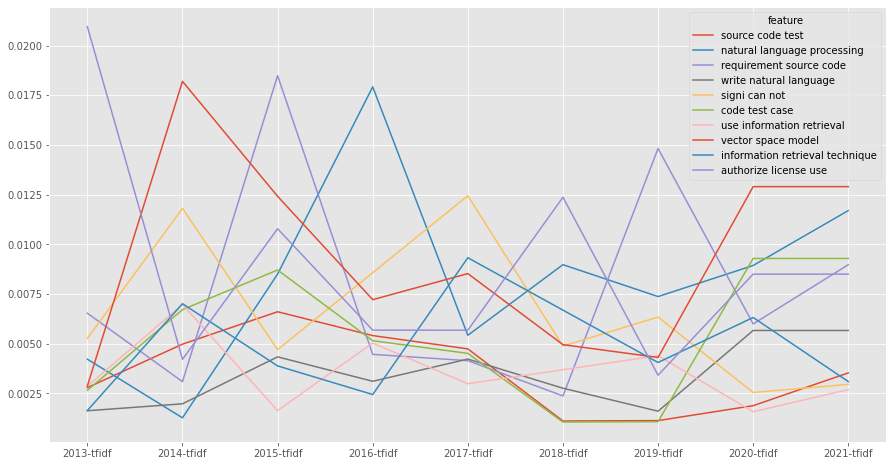

In [50]:
feats_df_3_sorted_sub = feats_df_3_sorted[:10]
feats_df_3_sorted_sub = feats_df_3_sorted_sub.interpolate(axis=1)
feats_df_3_sorted_sub.transpose().plot(figsize=(15,8))

## Embeddings - Dictionary filtering

In [51]:
# from gensim.models.wrappers import FastText

# model = FastText.load_fasttext_format('wiki.en.bin')

In [52]:
# from gensim.scripts.glove2word2vec import glove2word2vec
# glove2word2vec(glove_input_file="glove.6B.50d.txt", word2vec_output_file="glove.w2v.txt")

In [53]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("C:/Users/biadge/OneDrive - BP/PhD/extraction/SO_vectors_200.bin", binary=True)

In [54]:
unigram_feats = top_sum_feats(X_1, features_1)[:50]['feature'].tolist()
all_feats = top_sum_feats(X, features)[:50]['feature'].tolist()

In [55]:
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words, ranked=False):
    
    vec_list = []
    
    for w in words:
        try:
            vec_list.append(model[w])
        except:
            continue
    
    word_vectors = np.array(vec_list)
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    
    x = twodim[:,0]
    y = twodim[:,1]
    
    plt.scatter(x, y)
    
    for i in range(len(x)):
        plt.annotate(words[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.show()

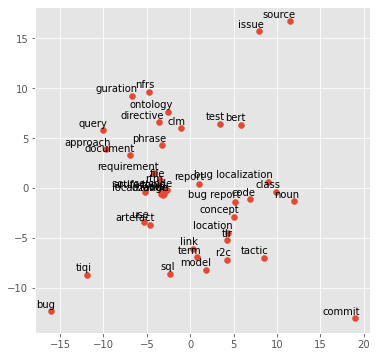

In [56]:
display_pca_scatterplot(model, all_feats)

In [57]:
from sklearn.manifold import TSNE

In [58]:
def display_tsne_scatterplot(model, words, ranked=False):

    labels = []
    tokens = []
    
#     if not ranked:
#         words = words[1:]

    for w in words:
        
        try:
            tokens.append(model[w])
            labels.append(w)
        except:
            continue
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=48)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    if ranked:
        pass
    
    plt.show()

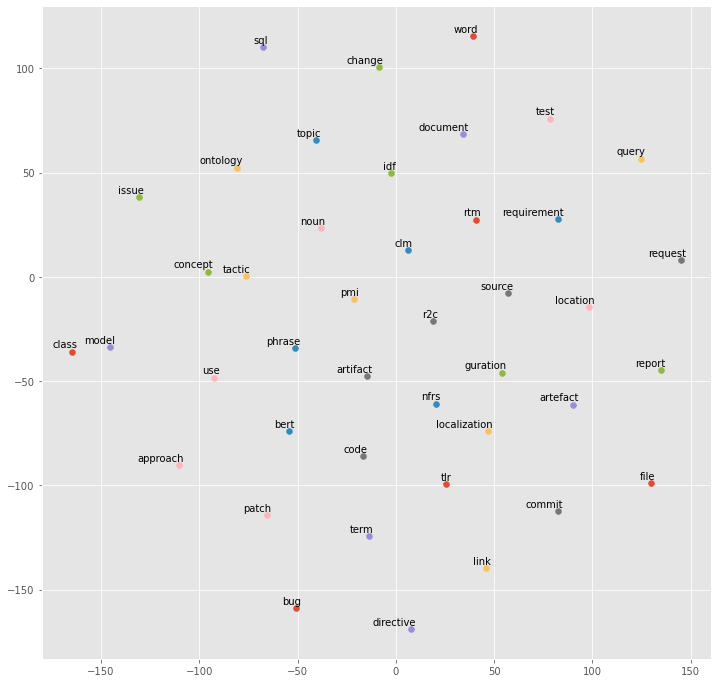

In [59]:
display_tsne_scatterplot(model,all_feats)

### Nearest points for word vectors input

In [60]:
feats_sum_df = top_sum_feats(X, features)
feats_mean_df = top_mean_feats(X, features)
feats_sum_df = feats_sum_df[feats_sum_df['tfidf']>0]
feats_mean_df = feats_mean_df[feats_mean_df['tfidf']>0]

In [61]:
feats_df = feats_sum_df.merge(feats_mean_df, on='feature', suffixes=('_sum', '_mean'))
feats_df[:10]

,feature,tfidf_sum,tfidf_mean
0,bug,3.486288,0.036315
1,requirement,3.083796,0.032123
2,artefact,3.081053,0.032094
3,code,2.159706,0.022497
4,link,2.143338,0.022326
5,bug report,2.109259,0.021971
6,report,1.716762,0.017883
7,use,1.421073,0.014803
8,rtm,1.214000,0.012646
9,bert,1.174115,0.012230


In [62]:
feats_df.to_csv("feats_df.csv", index=False)

In [63]:
def get_cos_sim(x, model, word):
    try:
        res = model.similarity(x, word)
    except:
        res = 0
    return res

In [64]:
get_cos_sim('report', model, 'bug')

0.17773233

In [65]:
def top_n_ranked_terms(df, model, word_input, top_n=20):

    df['similarity'] = df['feature'].apply(lambda x: get_cos_sim(x, model, word_input))
    df['similarity'] = df['similarity'].map(lambda x: '{0:.6f}'.format(x))
    df = df.sort_values('similarity', ascending=False).reset_index(drop=True)
    
    return df[:top_n]

## User input: requirement

In [66]:
ranked_req_feats_df = top_n_ranked_terms(feats_df, model, 'requirement', 21)
ranked_req_feats_df[1:11]

,feature,tfidf_sum,tfidf_mean,similarity
1,hipaa,0.444832,0.004634,0.414685
2,regulation,0.100983,0.001052,0.407030
3,constraint,0.151056,0.001573,0.381385
4,recommendation,0.111307,0.001159,0.376611
5,design,0.231113,0.002407,0.341189
6,feature,0.320274,0.003336,0.340356
7,concept,1.039709,0.010830,0.336251
8,architecture,0.408576,0.004256,0.333967
9,case,0.260381,0.002712,0.321802
10,knowledge,0.115923,0.001208,0.310221


In [67]:
model.most_similar(positive=['healthcare','requirement'], negative=[], topn=10, restrict_vocab=None)

[('requirements', 0.7149343490600586),
 ('regulatory', 0.6758537292480469),
 ('regulations', 0.6599622964859009),
 ('regulation', 0.6577485799789429),
 ('government', 0.6470068693161011),
 ('telecommunication', 0.6358578205108643),
 ('medical', 0.626889705657959),
 ('ehr', 0.6245075464248657),
 ('telecom', 0.6242926120758057),
 ('demands', 0.6223253011703491)]

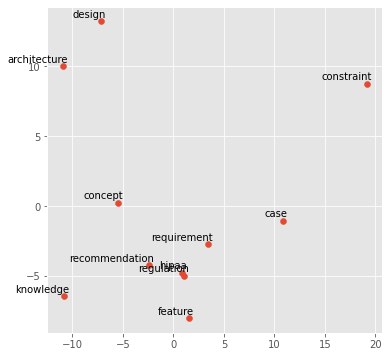

In [68]:
display_pca_scatterplot(model, ranked_req_feats_df['feature'].tolist()[0:11], ranked=True)

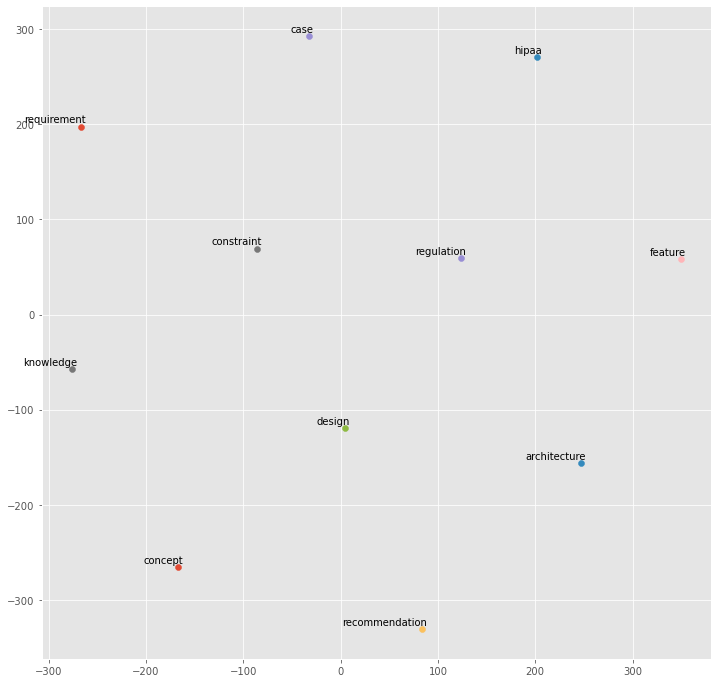

In [69]:
display_tsne_scatterplot(model, ranked_req_feats_df['feature'].tolist()[0:11], ranked=True)

## User input: design

In [70]:
ranked_des_feats_df = top_n_ranked_terms(feats_df, model, 'design', 21)
ranked_des_feats_df[1:11]

,feature,tfidf_sum,tfidf_mean,similarity
1,architectural,0.385502,0.004016,0.699393
2,architecture,0.408576,0.004256,0.589876
3,modularization,0.188131,0.001960,0.518056
4,approach,0.767521,0.007995,0.481808
5,compositional,0.101300,0.001055,0.466911
6,concept,1.039709,0.010830,0.456808
7,uml,0.189616,0.001975,0.449373
8,functional,0.142955,0.001489,0.448855
9,consistency,0.349627,0.003642,0.447875
10,sdlc,0.101629,0.001059,0.433501


In [71]:
model.most_similar(positive=['healthcare','design'], negative=[], topn=10, restrict_vocab=None)

[('architects', 0.7192467451095581),
 ('designing', 0.6962529420852661),
 ('industry', 0.671805202960968),
 ('medical', 0.6660199761390686),
 ('technological', 0.663608193397522),
 ('economic', 0.663145899772644),
 ('regulatory', 0.6570987701416016),
 ('industrial', 0.6561939120292664),
 ('avionics', 0.6510810852050781),
 ('logistics', 0.6475102305412292)]

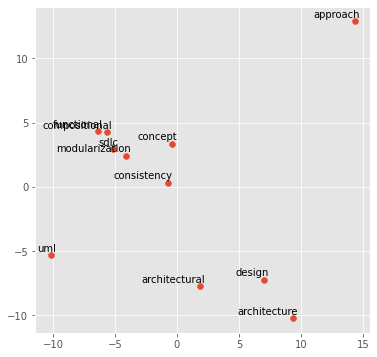

In [72]:
display_pca_scatterplot(model, ranked_des_feats_df['feature'].tolist()[0:11], ranked=True)

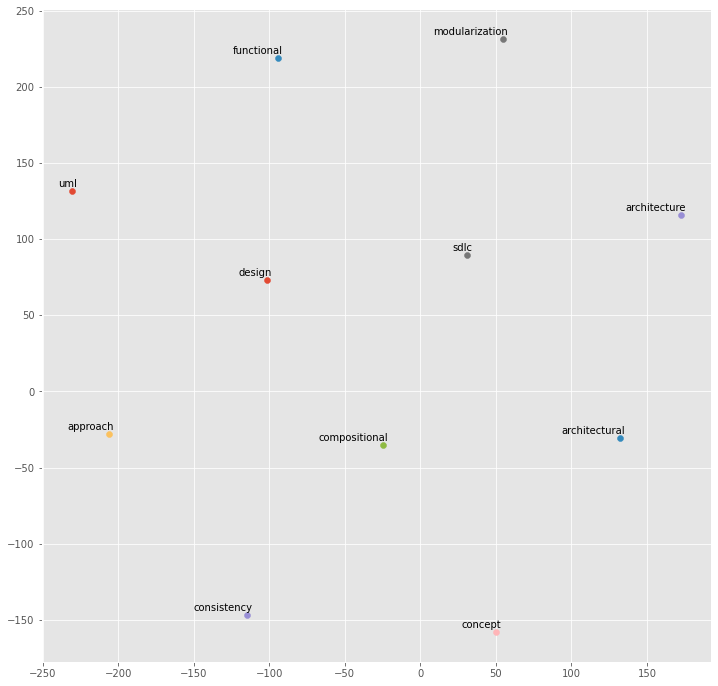

In [73]:
display_tsne_scatterplot(model, ranked_des_feats_df['feature'].tolist()[0:11], ranked=True)

# Time series matrix - requirement

In [74]:
df_meta_req = df.drop(columns=['Text_extract', 'Year', 'File_name'])

In [75]:
def get_term_tfidf(row, term):
    df = top_feats_in_doc(X, features, row)
    
    df = df[df['feature']==term]
    
    if df.empty:
        return None
    
    tfidf_score = df['tfidf'].tolist()[0]
    
    return tfidf_score

In [76]:
from tqdm import tqdm
term_req_tfidf_list = [get_term_tfidf(x, 'requirement') for x in tqdm(range(0,len(df_meta_req)))]





  0%|          | 0/96 [00:00<?, ?it/s]



  1%|          | 1/96 [00:00<00:12,  7.81it/s]



  2%|▏         | 2/96 [00:00<00:12,  7.33it/s]



  3%|▎         | 3/96 [00:00<00:12,  7.47it/s]



  4%|▍         | 4/96 [00:00<00:11,  7.85it/s]



  5%|▌         | 5/96 [00:00<00:11,  8.23it/s]



  6%|▋         | 6/96 [00:00<00:12,  7.50it/s]



  7%|▋         | 7/96 [00:00<00:11,  7.91it/s]



  8%|▊         | 8/96 [00:01<00:11,  7.74it/s]



  9%|▉         | 9/96 [00:01<00:11,  7.62it/s]



 10%|█         | 10/96 [00:01<00:12,  7.03it/s]



 11%|█▏        | 11/96 [00:01<00:11,  7.39it/s]



 12%|█▎        | 12/96 [00:01<00:10,  7.72it/s]



 14%|█▎        | 13/96 [00:01<00:10,  8.13it/s]



 15%|█▍        | 14/96 [00:01<00:09,  8.29it/s]



 16%|█▌        | 15/96 [00:01<00:09,  8.39it/s]



 17%|█▋        | 16/96 [00:02<00:09,  8.72it/s]



 18%|█▊        | 17/96 [00:02<00:09,  8.56it/s]



 19%|█▉        | 18/96 [00:02<00:09,  8.28it/s]



 20%|█▉        | 19/96 [00:02<00:09,  8.40it/

In [77]:
df_meta_req['requirement_tfidf_score'] = term_req_tfidf_list
df_meta_req = df_meta_req.groupby('Timestamp')['requirement_tfidf_score'].mean()
df_meta_req = df_meta_req.reset_index()
df_meta_req = df_meta_req.set_index('Timestamp', drop=True)
df_meta_req[:10]

,requirement_tfidf_score
Timestamp,
2013-02,0.003757
2013-03,0.007680
2013-05,0.030750
2013-07,0.027125
2013-09,0.121883
2013-10,0.123829
2014-01,0.059735
2014-03,0.002277
2014-04,0.053494


In [78]:
df_meta_req_inter = df_meta_req.interpolate(axis=0)
df_meta_req_inter = df_meta_req_inter.dropna()
df_meta_req_inter.index = df_meta_req_inter.index.astype("datetime64[ns]")
df_meta_req_inter[:10]

,requirement_tfidf_score
Timestamp,
2013-02-01,0.003757
2013-03-01,0.007680
2013-05-01,0.030750
2013-07-01,0.027125
2013-09-01,0.121883
2013-10-01,0.123829
2014-01-01,0.059735
2014-03-01,0.002277
2014-04-01,0.053494


In [79]:
df_meta_req_inter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2013-02-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   requirement_tfidf_score  66 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


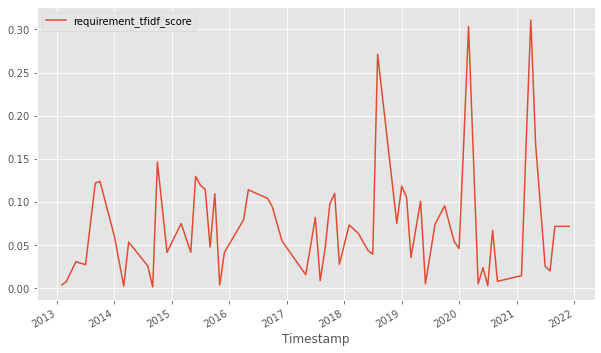

In [80]:
df_meta_req_inter.plot(kind='line', figsize=(10,6))

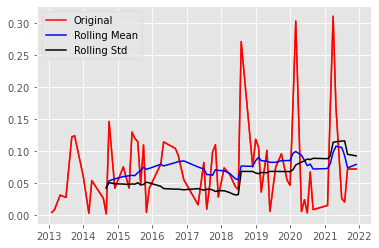

In [81]:
pd.plotting.register_matplotlib_converters()

ts_req = df_meta_req_inter['requirement_tfidf_score']
# plt.figure(figsize=(15,7))
fig = plt.figure(1)
plt.plot(df_meta_req_inter)

rollmean_req = ts_req.rolling(12).mean()
rollstd_req = ts_req.rolling(12).std()

orig_req = plt.plot(ts_req, color='red', label='Original')
mean_req = plt.plot(rollmean_req, color='blue', label='Rolling Mean')
std_req = plt.plot(rollstd_req, color='black', label='Rolling Std')
plt.legend(loc='best')

In [82]:
from statsmodels.tsa.stattools import adfuller

values_req = df_meta_req_inter['requirement_tfidf_score'].values
res_req = adfuller(values_req)

print('Augmented Dickey_fuller Statistic: %f' % res_req[0])
print('p-value: %f' % res_req[1])

print('critical values at different levels:')
for k, v in res_req[4].items():
    print('\t%s: %.3f' % (k, v))

Augmented Dickey_fuller Statistic: -5.513709
p-value: 0.000002
critical values at different levels:
	1%: -3.544
	5%: -2.911
	10%: -2.593


- ADF statistic is lower than the critical values at different levels
- p-value is also lower than 0.05
- we can reject our null hypothesis and conclude that our data is stationary.

In [83]:
df_meta_req_inter_sub = df_meta_req_inter.copy()
df_meta_req_inter_sub.index = pd.DatetimeIndex(df_meta_req_inter_sub.index).to_period('M')

In [84]:
df_meta_req_inter_sub[:10]

,requirement_tfidf_score
Timestamp,
2013-02,0.003757
2013-03,0.007680
2013-05,0.030750
2013-07,0.027125
2013-09,0.121883
2013-10,0.123829
2014-01,0.059735
2014-03,0.002277
2014-04,0.053494


In [85]:
ts_req_df = df_meta_req_inter_sub.reset_index(drop=True)
ts_req_df[:10]

,requirement_tfidf_score
0,0.003757
1,0.007680
2,0.030750
3,0.027125
4,0.121883
5,0.123829
6,0.059735
7,0.002277
8,0.053494
9,0.039600


In [86]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

ts_req_model = pm.auto_arima(ts_req_df.requirement_tfidf_score, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(ts_req_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-160.814, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-115.986, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-149.708, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-136.684, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-161.771, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-149.035, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-161.640, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-160.438, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-162.477, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-143.713, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-160.513, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-141.898, Time=0.15 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]       

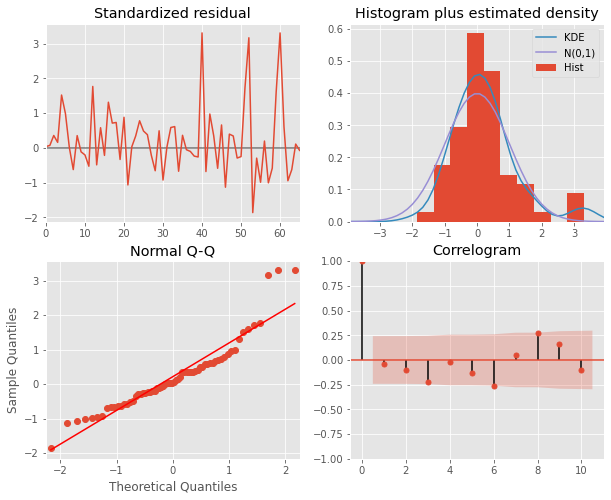

In [87]:
ts_req_model.plot_diagnostics(figsize=(10,8))
plt.show()

In [88]:
ts_req_df

,requirement_tfidf_score
0,0.003757
1,0.007680
2,0.030750
3,0.027125
4,0.121883
...,...
61,0.168200
62,0.025369
63,0.019888
64,0.071646


In [89]:
from datetime import datetime

xticks_req_label = df_meta_req_inter.index.tolist()
to_append_req=(['2022-01-01',
          '2022-02-01',
          '2022-03-01',
          '2022-04-01',
          '2022-05-01',
          '2022-06-01',
          '2022-07-01',
          '2022-08-01',
          '2022-09-01',
          '2022-10-01',
          '2022-11-01',
          '2022-12-01',
          '2023-01-01',
          '2023-02-01',
          '2023-03-01',
          '2023-04-01',
          '2023-05-01',
          '2023-06-01',
          '2023-07-01',
          '2023-08-01',
          '2023-09-01',
          '2023-10-01',
          '2023-11-01',
          '2023-12-01'])

to_append_req_ts = [pd.Timestamp(datetime.strptime(x, '%Y-%m-%d')) for x in to_append_req]

x_ticks_req_label = xticks_req_label+to_append_req_ts

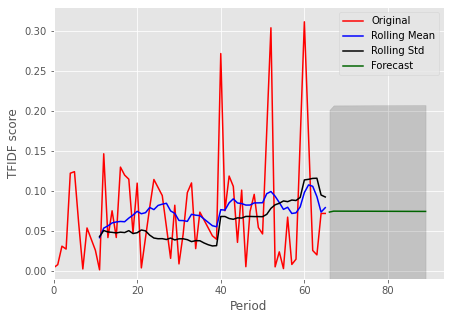

In [90]:
plt.rcParams['figure.figsize'] = [7, 5]

# Forecast
n_periods = 24
fc_req, confint_req = ts_req_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc_req = np.arange(len(ts_req_df.requirement_tfidf_score), len(ts_req_df.requirement_tfidf_score)+n_periods)

# make series for plotting purpose
fc_series_req = pd.Series(fc_req, index=index_of_fc_req)
lower_series_req = pd.Series(confint_req[:, 0], index=index_of_fc_req)
upper_series_req = pd.Series(confint_req[:, 1], index=index_of_fc_req)

# Plot
orig_req = plt.plot(ts_req_df.requirement_tfidf_score, color='red', label='Original')
plt.fill_between(lower_series_req.index, 
                 lower_series_req, 
                 upper_series_req, 
                 color='k', alpha=.15)

rollmean_req = ts_req_df.requirement_tfidf_score.rolling(12).mean()
rollstd_req = ts_req_df.requirement_tfidf_score.rolling(12).std()

mean_req = plt.plot(rollmean_req, color='blue', label='Rolling Mean')
std_req = plt.plot(rollstd_req, color='black', label='Rolling Std')
fc_req = plt.plot(fc_series_req, color='darkgreen', label='Forecast')

plt.xlabel("Period")
plt.ylabel("TFIDF score")
plt.legend(loc='best')

plt.ylim(ymin=-0.01)
plt.xlim(xmin=0)

# plt.xticks(np.arange(0, 89, step=1), xticks_label,  rotation='vertical')  # Set label locations.

plt.show()

In [91]:
fc_series_req

66    0.073365
67    0.074509
68    0.074493
69    0.074478
70    0.074462
71    0.074446
72    0.074431
73    0.074415
74    0.074399
75    0.074384
76    0.074368
77    0.074352
78    0.074337
79    0.074321
80    0.074305
81    0.074290
82    0.074274
83    0.074259
84    0.074243
85    0.074227
86    0.074212
87    0.074196
88    0.074180
89    0.074165
dtype: float64

In [92]:
lower_series_req

66   -0.054157
67   -0.057598
68   -0.057645
69   -0.057692
70   -0.057740
71   -0.057787
72   -0.057834
73   -0.057882
74   -0.057929
75   -0.057976
76   -0.058023
77   -0.058070
78   -0.058118
79   -0.058165
80   -0.058212
81   -0.058259
82   -0.058306
83   -0.058353
84   -0.058400
85   -0.058447
86   -0.058494
87   -0.058541
88   -0.058588
89   -0.058635
dtype: float64

In [93]:
upper_series_req

66    0.200888
67    0.206616
68    0.206632
69    0.206648
70    0.206664
71    0.206680
72    0.206696
73    0.206712
74    0.206728
75    0.206743
76    0.206759
77    0.206775
78    0.206791
79    0.206807
80    0.206823
81    0.206838
82    0.206854
83    0.206870
84    0.206886
85    0.206901
86    0.206917
87    0.206933
88    0.206948
89    0.206964
dtype: float64

# Time series matrix - design

In [94]:
df_meta_des = df.drop(columns=['Text_extract', 'Year', 'File_name'])

In [95]:
def get_term_tfidf(row, term):
    df = top_feats_in_doc(X, features, row)
    
    df = df[df['feature']==term]
    
    if df.empty:
        return None
    
    tfidf_score = df['tfidf'].tolist()[0]
    
    return tfidf_score

In [96]:
from tqdm import tqdm
term_des_tfidf_list = [get_term_tfidf(x, 'design') for x in tqdm(range(0,len(df_meta_des)))]





  0%|          | 0/96 [00:00<?, ?it/s]



  1%|          | 1/96 [00:00<00:13,  7.19it/s]



  2%|▏         | 2/96 [00:00<00:12,  7.62it/s]



  3%|▎         | 3/96 [00:00<00:12,  7.75it/s]



  4%|▍         | 4/96 [00:00<00:11,  8.03it/s]



  5%|▌         | 5/96 [00:00<00:11,  8.20it/s]



  6%|▋         | 6/96 [00:00<00:10,  8.36it/s]



  7%|▋         | 7/96 [00:00<00:10,  8.35it/s]



  8%|▊         | 8/96 [00:00<00:10,  8.07it/s]



  9%|▉         | 9/96 [00:01<00:11,  7.57it/s]



 10%|█         | 10/96 [00:01<00:10,  7.88it/s]



 11%|█▏        | 11/96 [00:01<00:10,  8.07it/s]



 12%|█▎        | 12/96 [00:01<00:10,  8.03it/s]



 14%|█▎        | 13/96 [00:01<00:10,  8.06it/s]



 15%|█▍        | 14/96 [00:01<00:09,  8.50it/s]



 16%|█▌        | 15/96 [00:01<00:09,  8.28it/s]



 17%|█▋        | 16/96 [00:01<00:09,  8.08it/s]



 18%|█▊        | 17/96 [00:02<00:09,  8.27it/s]



 19%|█▉        | 18/96 [00:02<00:09,  8.17it/s]



 20%|█▉        | 19/96 [00:02<00:09,  8.16it/

In [97]:
df_meta_des['design_tfidf_score'] = term_des_tfidf_list
df_meta_des = df_meta_des.groupby('Timestamp')['design_tfidf_score'].mean()
df_meta_des = df_meta_des.reset_index()
df_meta_des = df_meta_des.set_index('Timestamp', drop=True)
df_meta_des[:10]

,design_tfidf_score
Timestamp,
2013-02,NaN
2013-03,0.004139
2013-05,0.006497
2013-07,0.006498
2013-09,NaN
2013-10,0.002318
2014-01,0.010982
2014-03,0.001636
2014-04,0.002185


In [98]:
df_meta_des_inter = df_meta_des.interpolate(axis=0)
df_meta_des_inter = df_meta_des_inter.dropna()
df_meta_des_inter.index = df_meta_des_inter.index.astype("datetime64[ns]")
df_meta_des_inter[:10]

,design_tfidf_score
Timestamp,
2013-03-01,0.004139
2013-05-01,0.006497
2013-07-01,0.006498
2013-09-01,0.004408
2013-10-01,0.002318
2014-01-01,0.010982
2014-03-01,0.001636
2014-04-01,0.002185
2014-06-01,0.004556


In [99]:
df_meta_des_inter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2013-03-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   design_tfidf_score  65 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


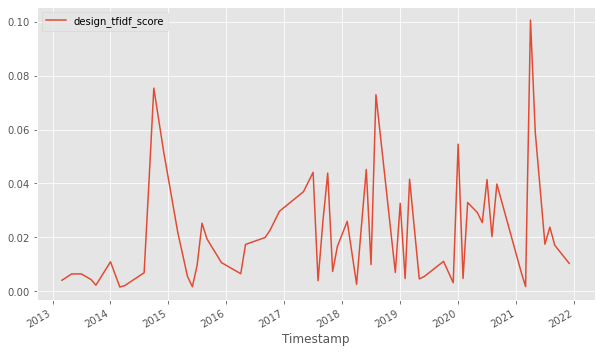

In [100]:
df_meta_des_inter.plot(kind='line', figsize=(10,6))

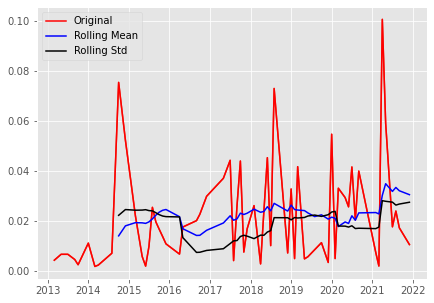

In [101]:
pd.plotting.register_matplotlib_converters()

ts_des = df_meta_des_inter['design_tfidf_score']
# plt.figure(figsize=(15,7))
fig = plt.figure(1)
plt.plot(df_meta_des_inter)

rollmean_des = ts_des.rolling(12).mean()
rollstd_des = ts_des.rolling(12).std()

orig_des = plt.plot(ts_des, color='red', label='Original')
mean_des = plt.plot(rollmean_des, color='blue', label='Rolling Mean')
std_des = plt.plot(rollstd_des, color='black', label='Rolling Std')
plt.legend(loc='best')

In [102]:
from statsmodels.tsa.stattools import adfuller

values_des = df_meta_des_inter['design_tfidf_score'].values
res_des = adfuller(values_des)

print('Augmented Dickey_fuller Statistic: %f' % res_des[0])
print('p-value: %f' % res_des[1])

print('critical values at different levels:')
for k, v in res_des[4].items():
    print('\t%s: %.3f' % (k, v))

Augmented Dickey_fuller Statistic: -6.851440
p-value: 0.000000
critical values at different levels:
	1%: -3.537
	5%: -2.908
	10%: -2.591


- ADF statistic is lower than the critical values at different levels
- p-value is also lower than 0.05
- we can reject our null hypothesis and conclude that our data is stationary.

In [103]:
df_meta_des_inter_sub = df_meta_des_inter.copy()
df_meta_des_inter_sub.index = pd.DatetimeIndex(df_meta_des_inter_sub.index).to_period('M')

In [104]:
df_meta_des_inter_sub[:10]

,design_tfidf_score
Timestamp,
2013-03,0.004139
2013-05,0.006497
2013-07,0.006498
2013-09,0.004408
2013-10,0.002318
2014-01,0.010982
2014-03,0.001636
2014-04,0.002185
2014-06,0.004556


In [105]:
ts_des_df = df_meta_des_inter_sub.reset_index(drop=True)
ts_des_df[:10]

,design_tfidf_score
0,0.004139
1,0.006497
2,0.006498
3,0.004408
4,0.002318
5,0.010982
6,0.001636
7,0.002185
8,0.004556
9,0.006927


In [106]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

ts_des_model = pm.auto_arima(ts_des_df.design_tfidf_score, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(ts_des_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-311.982, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-270.968, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-297.648, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-285.289, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-310.970, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-310.858, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-290.880, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-302.765, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-308.183, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-315.668, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-317.409, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-318.249, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-317.558, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.551 seconds
                      

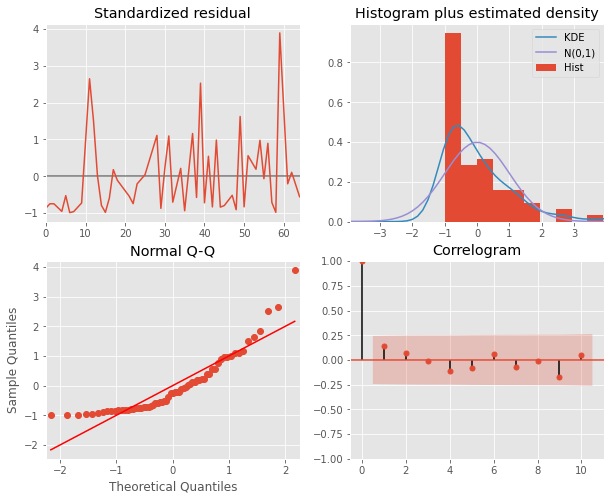

In [107]:
ts_des_model.plot_diagnostics(figsize=(10,8))
plt.show()

In [108]:
ts_des_df

,design_tfidf_score
0,0.004139
1,0.006497
2,0.006498
3,0.004408
4,0.002318
...,...
60,0.059042
61,0.017502
62,0.023820
63,0.017111


In [109]:
from datetime import datetime

xticks_des_label = df_meta_des_inter.index.tolist()
to_append_des=(['2022-01-01',
          '2022-02-01',
          '2022-03-01',
          '2022-04-01',
          '2022-05-01',
          '2022-06-01',
          '2022-07-01',
          '2022-08-01',
          '2022-09-01',
          '2022-10-01',
          '2022-11-01',
          '2022-12-01',
          '2023-01-01',
          '2023-02-01',
          '2023-03-01',
          '2023-04-01',
          '2023-05-01',
          '2023-06-01',
          '2023-07-01',
          '2023-08-01',
          '2023-09-01',
          '2023-10-01',
          '2023-11-01',
          '2023-12-01'])

to_append_des_ts = [pd.Timestamp(datetime.strptime(x, '%Y-%m-%d')) for x in to_append_des]

x_ticks_des_label = xticks_des_label+to_append_des_ts

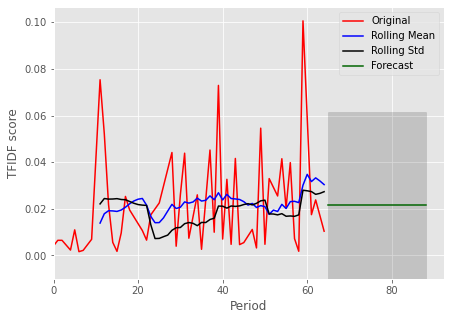

In [110]:
plt.rcParams['figure.figsize'] = [7, 5]

# Forecast
n_periods = 24
fc_des, confint_des = ts_des_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc_des = np.arange(len(ts_des_df.design_tfidf_score), len(ts_des_df.design_tfidf_score)+n_periods)

# make series for plotting purpose
fc_series_des = pd.Series(fc_des, index=index_of_fc_des)
lower_series_des = pd.Series(confint_des[:, 0], index=index_of_fc_des)
upper_series_des = pd.Series(confint_des[:, 1], index=index_of_fc_des)

# Plot
orig_des = plt.plot(ts_des_df.design_tfidf_score, color='red', label='Original')
plt.fill_between(lower_series_des.index, 
                 lower_series_des, 
                 upper_series_des, 
                 color='k', alpha=.15)

rollmean_des = ts_des_df.design_tfidf_score.rolling(12).mean()
rollstd_des = ts_des_df.design_tfidf_score.rolling(12).std()

mean_des = plt.plot(rollmean_des, color='blue', label='Rolling Mean')
std_des = plt.plot(rollstd_des, color='black', label='Rolling Std')
fc_des = plt.plot(fc_series_des, color='darkgreen', label='Forecast')

plt.xlabel("Period")
plt.ylabel("TFIDF score")
plt.legend(loc='best')

plt.ylim(ymin=-0.01)
plt.xlim(xmin=0)

# plt.xticks(np.arange(0, 89, step=1), xticks_label,  rotation='vertical')  # Set label locations.

plt.show()

In [111]:
fc_series_des

65    0.021607
66    0.021607
67    0.021607
68    0.021607
69    0.021607
70    0.021607
71    0.021607
72    0.021607
73    0.021607
74    0.021607
75    0.021607
76    0.021607
77    0.021607
78    0.021607
79    0.021607
80    0.021607
81    0.021607
82    0.021607
83    0.021607
84    0.021607
85    0.021607
86    0.021607
87    0.021607
88    0.021607
dtype: float64

In [112]:
lower_series_des

65   -0.018155
66   -0.018155
67   -0.018155
68   -0.018155
69   -0.018155
70   -0.018155
71   -0.018155
72   -0.018155
73   -0.018155
74   -0.018155
75   -0.018155
76   -0.018155
77   -0.018155
78   -0.018155
79   -0.018155
80   -0.018155
81   -0.018155
82   -0.018155
83   -0.018155
84   -0.018155
85   -0.018155
86   -0.018155
87   -0.018155
88   -0.018155
dtype: float64

In [113]:
upper_series_des

65    0.061369
66    0.061369
67    0.061369
68    0.061369
69    0.061369
70    0.061369
71    0.061369
72    0.061369
73    0.061369
74    0.061369
75    0.061369
76    0.061369
77    0.061369
78    0.061369
79    0.061369
80    0.061369
81    0.061369
82    0.061369
83    0.061369
84    0.061369
85    0.061369
86    0.061369
87    0.061369
88    0.061369
dtype: float64